<a href="https://colab.research.google.com/github/mhrhpr/HR_analytics_dashboard/blob/main/hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00


In [ ]:
from faker import Faker
import pandas as pd
import random

# فارسی‌ساز
fake = Faker('fa_IR')
Faker.seed(0)
random.seed(0)

# تنظیمات برای تولید داده
num_records = 1000
departments = ['منابع انسانی', 'مالی', 'فناوری اطلاعات', 'بازاریابی', 'فروش', 'تدارکات', 'پشتیبانی']
positions = ['کارشناس', 'کارشناس ارشد', 'مدیر', 'سرپرست', 'اپراتور']
marital_statuses = ['مجرد', 'متأهل']
genders = ['مرد', 'زن']
statuses = ['فعال', 'غیرفعال']

# ساخت دیتای تصادفی
data = []

for i in range(1, num_records + 1):
    gender = random.choice(genders)
    salary = random.randint(70_000_000, 200_000_000)
    overtime_hours = random.randint(0, 50)
    overtime_cost = overtime_hours * 100_000
    mission_count = random.randint(0, 5)
    mission_cost = mission_count * random.randint(1_000_000, 5_000_000)
    insurance_cost = int(salary * 0.23)
    status = random.choices(statuses, weights=[90, 10])[0]
    hire_date = fake.date_between(start_date='-13y', end_date='today')
    exit_date = fake.date_between(start_date=hire_date, end_date='today') if status == 'غیرفعال' else None

    data.append({
        "شناسه": i,
        "نام": fake.first_name_male() if gender == 'مرد' else fake.first_name_female(),
        "نام خانوادگی": fake.last_name(),
        "جنسیت": gender,
        "وضعیت تأهل": random.choice(marital_statuses),
        "دپارتمان": random.choice(departments),
        "سمت": random.choice(positions),
        "تاریخ استخدام": hire_date,
        "حقوق پایه": salary,
        "ساعات اضافه‌کاری": overtime_hours,
        "هزینه اضافه‌کاری": overtime_cost,
        "تعداد مأموریت": mission_count,
        "هزینه مأموریت": mission_cost,
        "هزینه بیمه": insurance_cost,
        "وضعیت": status,
        "تاریخ خروج": exit_date,
        "مرخصی استفاده‌شده (روز)": random.randint(0, 30)
    })

df = pd.DataFrame(data)

# ذخیره فایل اکسل
df.to_excel("hr_dataset_farsi.xlsx", index=False)


In [ ]:
import pandas as pd

# خواندن فایل اکسل
df = pd.read_excel("hr_dataset_farsi.xlsx")

# تحلیل 1: میانگین حقوق
mean_salary = df['حقوق پایه'].mean()
print(f"میانگین حقوق: {mean_salary} IRR")

# تحلیل 2: تعداد کارمندان فعال و غیرفعال
status_counts = df['وضعیت'].value_counts()
print("\nتعداد کارمندان بر اساس وضعیت:")
print(status_counts)

# تحلیل 3: میانگین اضافه‌کاری
mean_overtime = df['ساعات اضافه‌کاری'].mean()
print(f"\nمیانگین ساعات اضافه‌کاری: {mean_overtime} ساعت")

# تحلیل 4: بیشترین هزینه اضافه‌کاری
max_overtime_cost = df['هزینه اضافه‌کاری'].max()
max_overtime_data = df[df['هزینه اضافه‌کاری'] == max_overtime_cost]
print("\nبیشترین هزینه اضافه‌کاری:")
print(max_overtime_data[['نام', 'نام خانوادگی', 'هزینه اضافه‌کاری']])

# تحلیل 5: بیشترین هزینه مأموریت
max_mission_cost = df['هزینه مأموریت'].max()
max_mission_data = df[df['هزینه مأموریت'] == max_mission_cost]
print("\nبیشترین هزینه مأموریت:")
print(max_mission_data[['نام', 'نام خانوادگی', 'هزینه مأموریت']])

# تحلیل 6: بررسی وضعیت بیمه (حقوق + هزینه بیمه)
df['حقوق و بیمه'] = df['حقوق پایه'] + df['هزینه بیمه']
mean_salary_with_insurance = df['حقوق و بیمه'].mean()
print(f"\nمیانگین حقوق + بیمه: {mean_salary_with_insurance} IRR")


میانگین حقوق: 136000777.29 IRR

تعداد کارمندان بر اساس وضعیت:
وضعیت
فعال       893
غیرفعال    107
Name: count, dtype: int64

میانگین ساعات اضافه‌کاری: 24.51 ساعت

بیشترین هزینه اضافه‌کاری:
           نام نام خانوادگی  هزینه اضافه‌کاری
15        حسام         هومن           5000000
177       مهدی         هومن           5000000
190       آتنا         دایی           5000000
255      محدثه        سمسار           5000000
372      سوگند     عبدالعلی           5000000
394   اميرحسين       سماوات           5000000
399   محمدجواد        پارسا           5000000
407  محمدياسين        دادفر           5000000
417    اميررضا        سعیدی           5000000
418   امیر علی        رودگر           5000000
445       آريا      علی پور           5000000
449      الناز        عزیزی           5000000
490   ابوالفضل       روحانی           5000000
548      فاطمه        سعیدی           5000000
582   اميرعباس     علی شاهی           5000000
648      آیلین        اشرفی           5000000
683       محمد        جهانی  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_excel('hr_dataset_farsi.xlsx')
df.head()



,شناسه,نام,نام خانوادگی,جنسیت,وضعیت تأهل,دپارتمان,سمت,تاریخ استخدام,حقوق پایه,ساعات اضافه‌کاری,هزینه اضافه‌کاری,تعداد مأموریت,هزینه مأموریت,هزینه بیمه,وضعیت,تاریخ خروج,مرخصی استفاده‌شده (روز)
0,1,مائده,دایی,زن,متأهل,بازاریابی,مدیر,2023-04-10,171730917,26,2600000,0,0,39498110,غیرفعال,2024-10-21,30
1,2,سارا,صنایعی,زن,مجرد,پشتیبانی,کارشناس,2015-08-29,118056573,37,3700000,1,3116810,27153011,فعال,NaT,19
2,3,نیایش,جنتی,زن,مجرد,فناوری اطلاعات,کارشناس,2017-07-23,192104075,34,3400000,5,21991485,44183937,فعال,NaT,23
3,4,نیما,اشتری,مرد,متأهل,بازاریابی,مدیر,2016-12-12,190640032,43,4300000,2,5960620,43847207,فعال,NaT,19
4,5,سینا,کمالی,مرد,متأهل,منابع انسانی,اپراتور,2014-02-07,199735710,35,3500000,3,8570370,45939213,فعال,NaT,29


## نرخ خروج


In [ ]:
turnover_rate = len(df[df['وضعیت']=='غیرفعال']) / len(df)*100
print(f'نرخ خروج : {turnover_rate:.2f}%')

نرخ خروج : 10.70%


# **بررسی اولیه داده ها**

In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   شناسه                    1000 non-null   int64         
 1   نام                      1000 non-null   object        
 2   نام خانوادگی             1000 non-null   object        
 3   جنسیت                    1000 non-null   object        
 4   وضعیت تأهل               1000 non-null   object        
 5   دپارتمان                 1000 non-null   object        
 6   سمت                      1000 non-null   object        
 7   تاریخ استخدام            1000 non-null   datetime64[ns]
 8   حقوق پایه                1000 non-null   int64         
 9   ساعات اضافه‌کاری         1000 non-null   int64         
 10  هزینه اضافه‌کاری         1000 non-null   int64         
 11  تعداد مأموریت            1000 non-null   int64         
 12  هزینه مأموریت            1000 non-n

,0
شناسه,0
نام,0
نام خانوادگی,0
جنسیت,0
وضعیت تأهل,0
دپارتمان,0
سمت,0
تاریخ استخدام,0
حقوق پایه,0
ساعات اضافه‌کاری,0


# **ایجاد ستون سابقه خدمت**

In [ ]:
df['سابقه خدمت -سال']=(pd.to_datetime('today')-df['تاریخ استخدام']).dt.days // 365

# **ایجاد ستون وضعیت شغلی**

In [ ]:
df['آیا فعال است؟'] = df['وضعیت'].apply(lambda x:1 if x=="فعال" else 0)

In [ ]:
df=pd.read_excel('hr_dataset_farsi.xlsx')
df.head()

,شناسه,نام,نام خانوادگی,جنسیت,وضعیت تأهل,دپارتمان,سمت,تاریخ استخدام,حقوق پایه,ساعات اضافه‌کاری,هزینه اضافه‌کاری,تعداد مأموریت,هزینه مأموریت,هزینه بیمه,وضعیت,تاریخ خروج,مرخصی استفاده‌شده (روز)
0,1,مائده,دایی,زن,متأهل,بازاریابی,مدیر,2023-04-10,171730917,26,2600000,0,0,39498110,غیرفعال,2024-10-21,30
1,2,سارا,صنایعی,زن,مجرد,پشتیبانی,کارشناس,2015-08-29,118056573,37,3700000,1,3116810,27153011,فعال,NaT,19
2,3,نیایش,جنتی,زن,مجرد,فناوری اطلاعات,کارشناس,2017-07-23,192104075,34,3400000,5,21991485,44183937,فعال,NaT,23
3,4,نیما,اشتری,مرد,متأهل,بازاریابی,مدیر,2016-12-12,190640032,43,4300000,2,5960620,43847207,فعال,NaT,19
4,5,سینا,کمالی,مرد,متأهل,منابع انسانی,اپراتور,2014-02-07,199735710,35,3500000,3,8570370,45939213,فعال,NaT,29


# **نمودار توزیع حقوق**

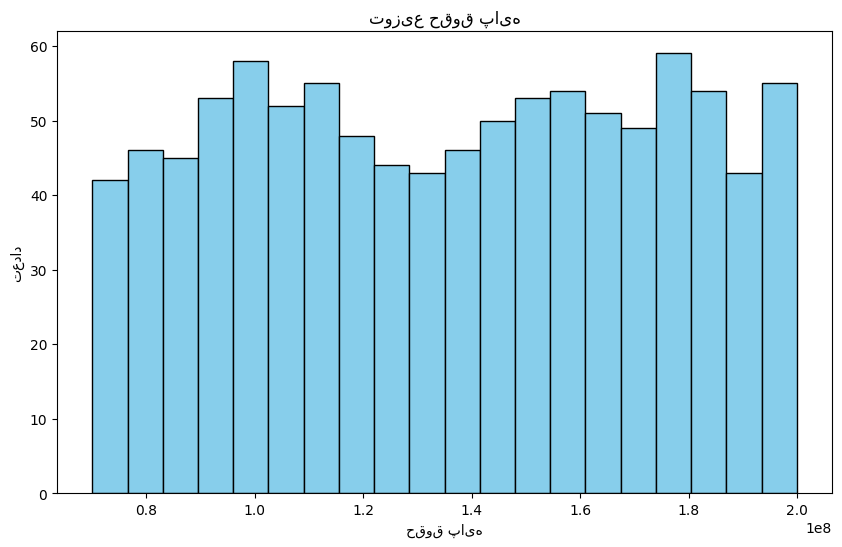

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['حقوق پایه'], bins=20,color='skyblue',edgecolor='black')
plt.title('توزیع حقوق پایه')
plt.xlabel('حقوق پایه')
plt.ylabel('تعداد')
plt.show()

# **رابطه بین حقوق و ساعات اضاقه کاری**

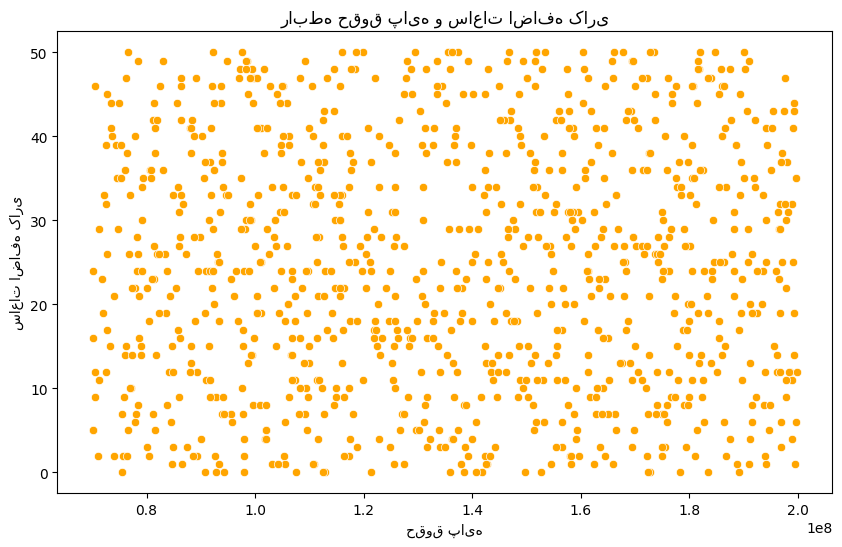

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='حقوق پایه',y='ساعات اضافه‌کاری',data=df,color='orange')
plt.title('رابطه حقوق پایه و ساعات اضافه کاری')
plt.xlabel('حقوق پایه')
plt.ylabel('ساعات اضافه کاری')
plt.show()

# **نمودار boxplot پراکندگی حقوق در دپارتمانها**

<ipython-input-26-f5016cfd5b9c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='دپارتمان',y='حقوق پایه',data=df,palette='Set3')


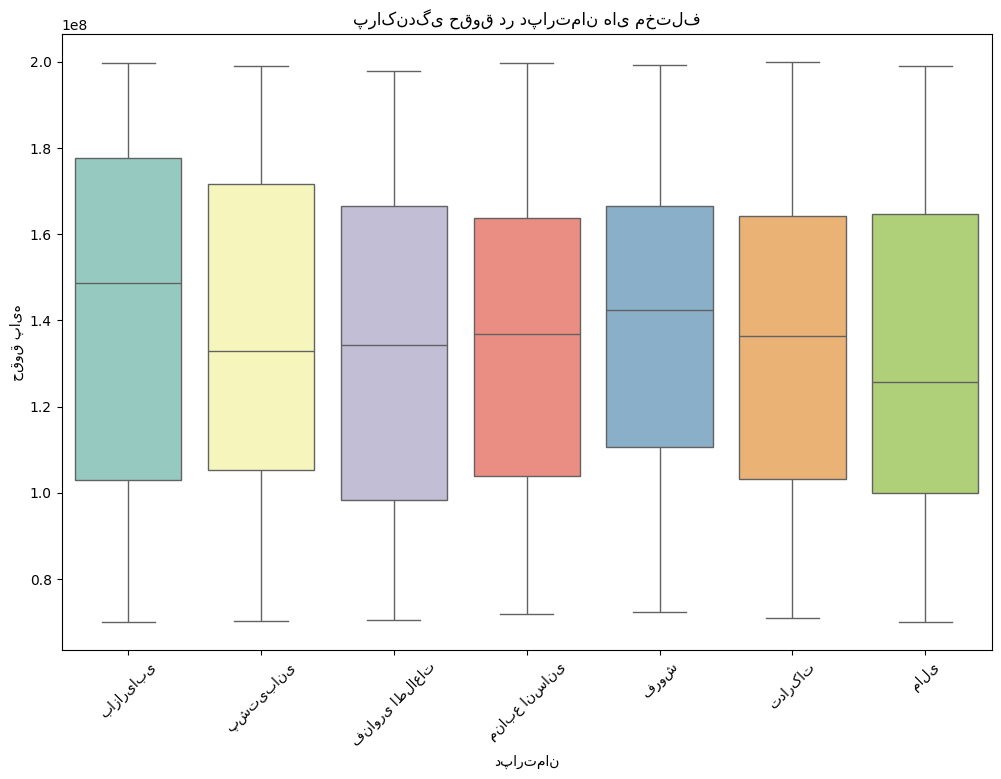

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(x='دپارتمان',y='حقوق پایه',data=df,palette='Set3')
plt.title('پراکندگی حقوق در دپارتمان های مختلف')
plt.xlabel('دپارتمان')
plt.ylabel('حقوق پایه')
plt.xticks(rotation=45)
plt.show()

نمودار pie درصد پرسنل فعال

ValueError: unsupported format character ' ' (0x20) at index 4

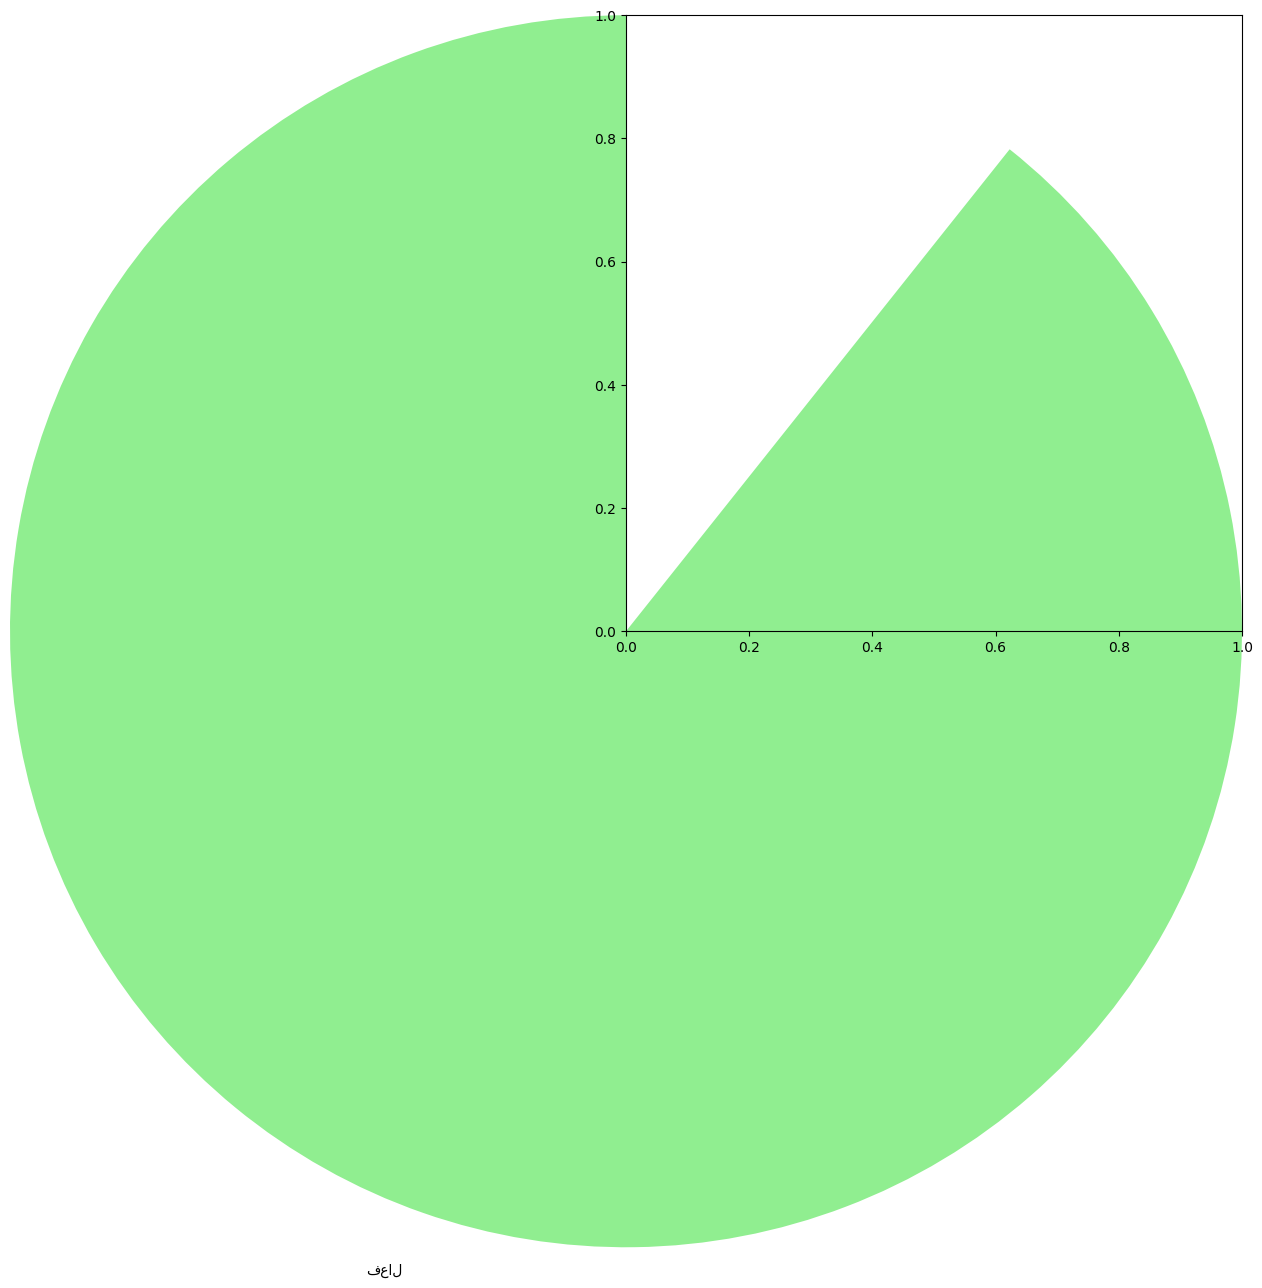

In [ ]:
status_counts = df['وضعیت'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(status_counts,labels=status_counts.index,autopct='%1.1 f%' , startangle=90,
        colors=['lightgreen','lightcoral'])
plt.title('وضعیت پرسنل')
plt.show()